## Example 1.2.20 (Calculating an average)

What is probability distribution of all the possible averages of $N$ numbers selected from {2,4,9,12}?

This is a typical "Unordered and with Replacement" case.

N = 1 , total probability = 1.0
N = 2 , total probability = 1.0
N = 4 , total probability = 1.0
N = 10 , total probability = 1.0
N = 30 , total probability = 0.9999999999999994


/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


N = 100 , total probability = 0.9999999999999998
N = 300 , total probability = 0.999999999999998


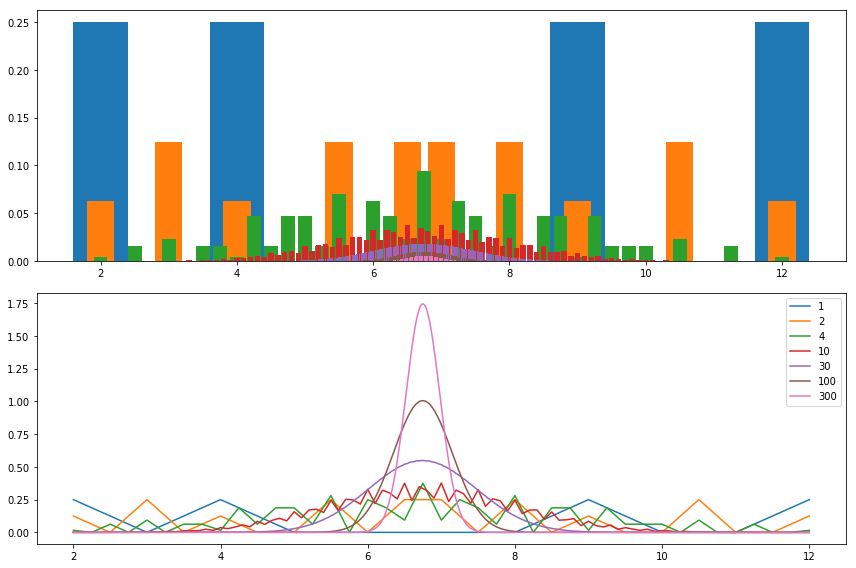

In [7]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

# Analytical solution
def pdfx(v, p, n):
    # v: all the values in the set 
    # p: probabilities of each value in the set
    # n: number of selection
    pdict = dict(zip(v, p))
    m = len(v)
    xmin = min(v) * n
    xmax = max(v) * n
    s = np.zeros([n, xmax])
    for i in v:   s[0, i-1] = pdict[i]
    jmin = min(v)-1; jmax = max(v)-1
    for i in range(1,n):
        jmin = min( jmin + min(v), xmax-1)
        jmax = max( min(jmax + max(v), xmax-1), jmin+1)
        for j in range(jmin, jmax+1):
            s[i,j] = 0
            for k in v:
                if (j-k >= 0) and (s[i-1,j-k]>0): 
                    s[i,j] += s[i-1, j-k]*pdict[k]
    return np.arange(xmin, xmax+1), s[n-1, (xmin-1):]

plt.figure(1, figsize=(12,8))
nlist = [1,2,4,10,30,100,300]
for n in nlist:
    x, p = pdfx([2,4,9,12], [1.0/4]*4, n)
    print('N =',n, ', total probability =', sum(p))
    plt.subplot(2,1,1)
    plt.bar(x/n, p, width=0.8/n)

    plt.subplot(2,1,2)
    plt.plot(x/n, p*n)

plt.legend(nlist, loc='best')

plt.tight_layout()
plt.show()

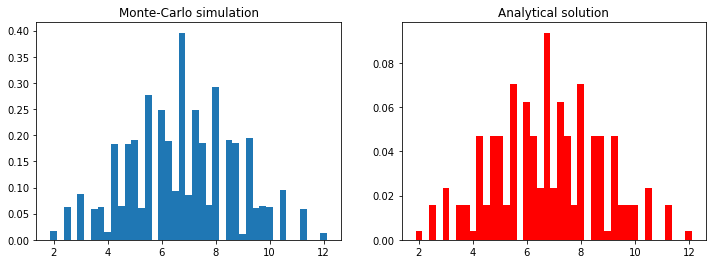

In [50]:
# Compared with Monte-Carlo simulation
import scipy.stats as stats

def MCsim(v, p, n, nsample=10000):
    m = len(v)
    cump = np.append([0], np.cumsum(p))
    x = stats.uniform.rvs(size=nsample*m).reshape(nsample, m)
    y = x*0
    for i in range(n):
        y[(x>=cump[i])&(x<cump[i+1])] = v[i]    
    return np.mean(y, axis=1)

plt.figure(1, figsize=(12,4))
plt.subplot(121)
y = MCsim(v=[2,4,9,12], p=[0.25]*4, n=4)
plt.hist(y, bins=np.linspace(2,12.25,42)-0.125, density = True)
plt.title('Monte-Carlo simulation')

plt.subplot(122)
x, p = pdfx([2,4,9,12], [0.25]*4, n=4)
plt.bar(x.astype('float')/4, p, color='r', width=0.25 )
plt.title('Analytical solution')

plt.show()